<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/Estatistica_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Definir o tamanho das figuras para todos os plots**

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

## Descritive Statistics

### Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/shampoo.csv', sep=',')

In [5]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [7]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


### Visualizations

#### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe67dd7250>]],
      dtype=object)

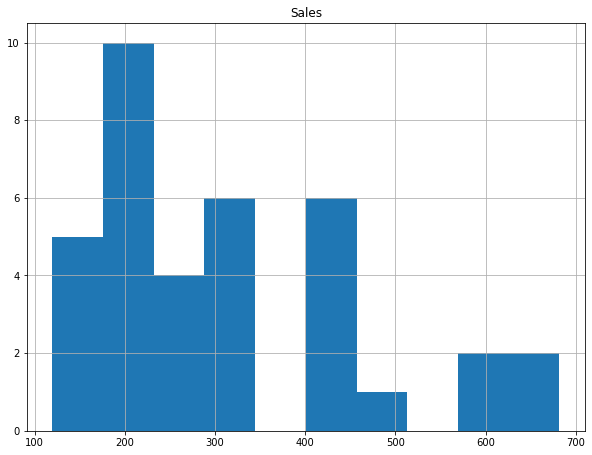

In [8]:
data.hist()

Text(0, 0.5, 'Frequency')

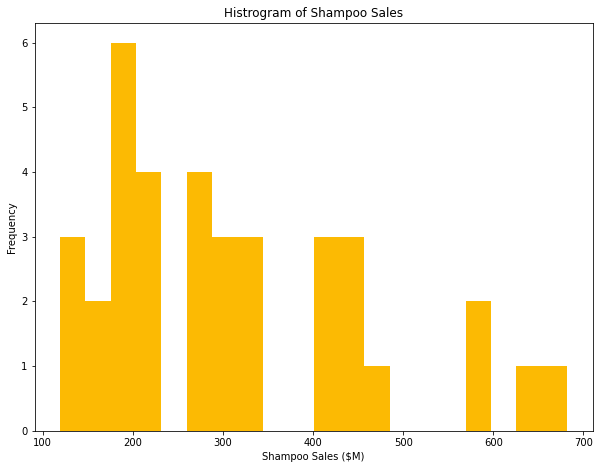

In [11]:
plt.hist(data['Sales'], bins = 20, color = '#fcba03')
plt.title('Histrogram of Shampoo Sales')
plt.xlabel('Shampoo Sales ($M)')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

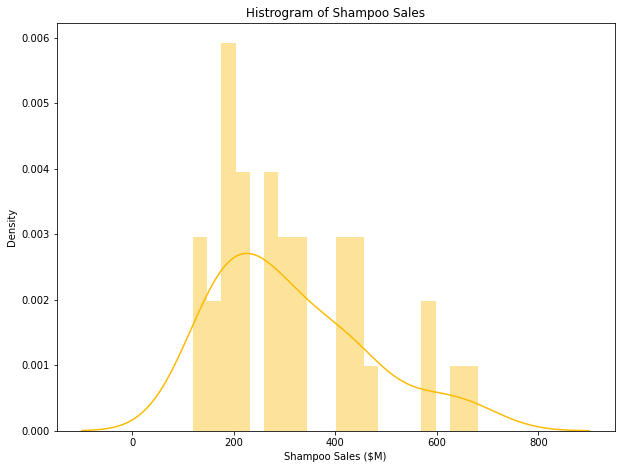

In [13]:
sns.distplot(data['Sales'], bins = 20, hist = True, kde = True, color = '#fcba03')
plt.title('Histrogram of Shampoo Sales')
plt.xlabel('Shampoo Sales ($M)')
plt.ylabel('Density')

### Scatterplots

Text(0.5, 0, 'Month')

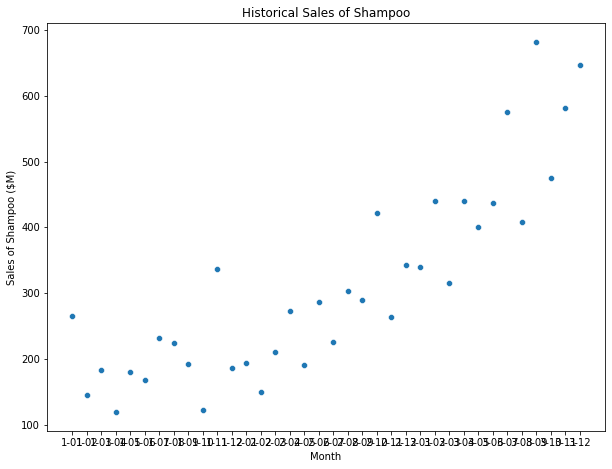

In [14]:
sns.scatterplot(x = data['Month'], y = data['Sales'])
plt.title('Historical Sales of Shampoo')
plt.ylabel('Sales of Shampoo ($M)')
plt.xlabel('Month')

## Inferential Statistics

In [15]:
co2_data = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/co2_dataset.csv')

In [16]:
co2_data.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157
